Using TensorFlow backend.


 8757248/11490434 [=====================>........] - ETA: 0s(50000, 28, 28) (50000,)


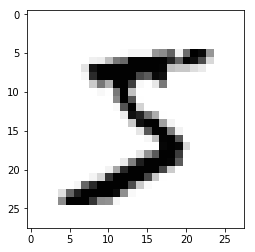

In [2]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


In [4]:
import numpy as np

In [5]:
X_train=X_train.reshape(50000,784)

In [6]:
X_test=X_test.reshape(10000,784)

In [7]:
X_val = X_val.reshape(10000,784)

In [8]:
import tensorflow as tf
X_data = tf.placeholder(tf.float32,shape=[None,784],name="X_data") 
Y_data = tf.placeholder(tf.float32,shape=[None,10],name="Y_data")

In [9]:
sess = tf.Session()

In [10]:
W1 = tf.get_variable("W1" , shape=[784,256], initializer=tf.contrib.layers.xavier_initializer(uniform=True,seed=None,dtype=tf.float32))
b1 = np.zeros(256)
W2 = tf.get_variable("W2" , shape=[256,256], initializer=tf.contrib.layers.xavier_initializer(uniform=True,seed=None,dtype=tf.float32))
b2 = np.zeros(256)
W3 = tf.get_variable("W3" , shape=[256,10], initializer=tf.contrib.layers.xavier_initializer(uniform=True,seed=None,dtype=tf.float32))
b3 = np.zeros(10)

In [11]:
Z1 = tf.add(tf.matmul(X_data,W1),b1)
A1 = tf.nn.relu(Z1)

In [12]:
print(Z1.shape)

(?, 256)


In [13]:
Z2 = tf.add(tf.matmul(A1,W2),b2)
A2 = tf.nn.relu(Z2)

In [14]:
Z3 = tf.add(tf.matmul(A2,W3),b3)
A3 = tf.nn.sigmoid(Z3)

In [15]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=A3,labels=Y_data))

In [16]:
print(cost)

Tensor("Mean:0", shape=(), dtype=float32)


In [37]:
learning_rate = 0.001

In [38]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [19]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [39]:
sess.run(init)

In [40]:
train_cost=[]
test_cost=[]
batch_size = 500
for epoch in range(200): #Number of epochs used are 200
        for i in range(0,100):
            sess.run(optimizer, feed_dict={X_data:X_train[i*batch_size:(i+1)*batch_size], Y_data:y_train[i*batch_size:(i+1)*batch_size]})
        cur_train_cost = sess.run(cost, feed_dict={X_data:X_train, Y_data:y_train})    
        train_cost.append(cur_train_cost)
        cur_test_cost = sess.run(cost, feed_dict={X_data:X_test, Y_data:y_test})
        test_cost.append(cur_test_cost)
        if epoch%20 == 19:
            print("Cost is :" + str(train_cost[-1]) + " after " + str(epoch+1) + " epochs")

Cost is :1.47006 after 20 epochs
Cost is :1.46534 after 40 epochs
Cost is :1.46389 after 60 epochs
Cost is :1.46322 after 80 epochs
Cost is :1.46321 after 100 epochs
Cost is :1.46303 after 120 epochs
Cost is :1.46303 after 140 epochs
Cost is :1.46295 after 160 epochs
Cost is :1.46284 after 180 epochs
Cost is :1.46276 after 200 epochs


In [41]:
#Predict the labels for test data.
y_predict = tf.argmax(Z3, 1)
y_true = tf.equal(y_predict, tf.argmax(Y_data, 1))

In [42]:
iterations = list(range(200))

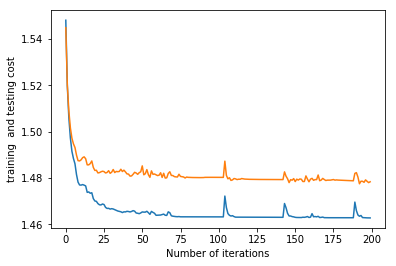

In [43]:
#Plot the graph for training and testing.
plt.plot(iterations, train_cost)
plt.plot(iterations, test_cost)
plt.ylabel('training  and testing cost')
plt.xlabel('Number of iterations')
plt.show()

In [44]:
#Compute Accuracy 
with sess.as_default():
    accuracy = tf.reduce_mean(tf.cast(y_true,dtype=tf.float32),axis=None,keep_dims=True,name="accuracy")
    train_accuracy = accuracy.eval({X_data: X_train, Y_data: y_train},session=sess)
    test_accuracy = accuracy.eval({X_data: X_test, Y_data: y_test},session=sess)
    print("Train data Accuracy:", train_accuracy)
    print("Test data Accuracy:", test_accuracy)

Train data Accuracy: [ 0.99809998]
Test data Accuracy: [ 0.9842]


In [45]:
sess.close()